In [3]:
import torch
import losslandscape as land
import matplotlib.pyplot as plt

from models import TransformerModelLoopedPyHessianWrapper, TransformerModelPyHessianWrapper
from curriculum import CurriculumSimple
from train import train_without_config, validate_model
from scripts.tasks import get_task_sampler

n_dims = 10
train_steps = 15000
log_every = 500
device = "cuda:0"

In [4]:
task_sampler = get_task_sampler(
    task_name="linear_regression",
    batch_size=64,
    n_points=31,
    n_dims=10,
    n_dims_truncated=10,
    device=device,
)

real_task = task_sampler()
xs, ys = real_task.xs.float(), real_task.ys.float()

In [5]:
## criterion functions for loss plot calculation 

def criterion_loop_fn(y_pred_list, ys_in):
    y_pred_arr = torch.cat(y_pred_list, dim=0)  # [B * K, n]
    y_star_arr = torch.cat([ys_in] * len(y_pred_list), dim=0)  # [B * K, n]
    return (y_star_arr - y_pred_arr).square().mean()

def criterion_base_fn(y_pred, ys):
    return (ys - y_pred).square().mean()


In [6]:
model_loop_b5 = TransformerModelLoopedPyHessianWrapper(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
    default_n_loops=5
).to(device)

model_b5_config = {
    "curriculum" : CurriculumSimple(n_dims, 31, 5, [5000, n_dims, 0], [5000, 31, 0], [1000, 5, 0]),
    "log_steps" : train_steps // log_every,
    "params" : [],
    "losses" : [],
    "metrics" : None
}

def callback_b5_fn(model, loss):
    model_b5_config["params"].append(land.ParamList(land.get_params(model)))
    model_b5_config["losses"].append(loss)


model_b5_config["metrics"] = train_without_config(
    model_loop_b5, model_b5_config["curriculum"], model_n_dims=n_dims,
    log_every_steps=log_every, train_steps=train_steps, family="gpt2_loop",
    do_wandb_log=False, seed=None, task_name="noisy_linear_regression", callback=callback_b5_fn)

number of parameters: 0.20M


  0%|          | 0/15000 [00:00<?, ?it/s]C:\Users\Vadim_K\DataspellProjects\looped_transformer\scripts\nano_gpt.py:79: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  y = torch.nn.functional.scaled_dot_product_attention(


0


loss 4.102899074554443: 100%|██████████| 15000/15000 [10:23<00:00, 24.06it/s] 


In [71]:
model_loop_l2_b5 = TransformerModelLoopedPyHessianWrapper(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=2,
    n_head=4,
    pred_type="regression",
    default_n_loops=5
).to(device)

model_l2_b5_config = {
    "curriculum" : CurriculumSimple(n_dims, 31, 5, [5000, n_dims, 0], [5000, 31, 0], [1000, 5, 0]),
    "log_steps" : train_steps // log_every,
    "params" : [],
    "losses" : [],
    "metrics" : None
}

def callback_l2_b5_fn(model, loss):
    model_l2_b5_config["params"].append(land.ParamList(land.get_params(model)))
    model_l2_b5_config["losses"].append(loss)


model_l2_b5_config["metrics"] = train_without_config(
    model_loop_l2_b5, model_l2_b5_config["curriculum"], model_n_dims=n_dims,
    log_every_steps=log_every, train_steps=train_steps, family="gpt2_loop",
    do_wandb_log=False, seed=None, task_name="noisy_linear_regression", callback=callback_l2_b5_fn)

number of parameters: 0.40M


loss 11.702688217163086:   0%|          | 2/15000 [00:00<17:40, 14.15it/s]

0


loss 2.8742151260375977: 100%|██████████| 15000/15000 [15:55<00:00, 15.71it/s]


In [20]:
model_loop_b10 = TransformerModelLoopedPyHessianWrapper(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
    default_n_loops=10
).to(device)

model_b10_config = {
    "curriculum" : CurriculumSimple(n_dims, 31, 10, [5000, n_dims, 0], [5000, 31, 0], [1000, 10, 0]),
    "log_steps" : train_steps // log_every,
    "params" : [],
    "losses" : [],
    "metrics" : None
}

def callback_b10_fn(model, loss):
    model_b10_config["params"].append(land.ParamList(land.get_params(model)))
    model_b10_config["losses"].append(loss)


model_b10_config["metrics"] = train_without_config(
    model_loop_b10, model_b10_config["curriculum"], model_n_dims=n_dims,
    log_every_steps=log_every, train_steps=train_steps, family="gpt2_loop",
    do_wandb_log=False, seed=None, task_name="noisy_linear_regression", callback=callback_b10_fn)

number of parameters: 0.20M


  0%|          | 0/15000 [00:00<?, ?it/s]

0


loss 3.322463274002075: 100%|██████████| 15000/15000 [17:43<00:00, 14.10it/s] 


In [27]:
model_loop_b15 = TransformerModelLoopedPyHessianWrapper(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
    default_n_loops=15
).to(device)

model_b15_config = {
    "curriculum" : CurriculumSimple(n_dims, 31, 15, [5000, n_dims, 0], [5000, 31, 0], [1000, 15, 0]),
    "log_steps" : train_steps // log_every,
    "params" : [],
    "losses" : [],
    "metrics" : None
}

def callback_b15_fn(model, loss):
    model_b15_config["params"].append(land.ParamList(land.get_params(model)))
    model_b15_config["losses"].append(loss)


model_b15_config["metrics"] = train_without_config(
    model_loop_b15, model_b15_config["curriculum"], model_n_dims=n_dims,
    log_every_steps=log_every, train_steps=train_steps, family="gpt2_loop",
    do_wandb_log=False, seed=None, task_name="noisy_linear_regression", callback=callback_b15_fn)

number of parameters: 0.20M


  0%|          | 0/15000 [00:00<?, ?it/s]

0


loss 3.0851147174835205: 100%|██████████| 15000/15000 [24:01<00:00, 10.41it/s]


In [7]:
model_l2 = TransformerModelPyHessianWrapper(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=2,
    n_head=4,
    pred_type="regression"
).to(device)

model_l2_config = {
    "curriculum" : CurriculumSimple(n_dims, 31, 0, [5000, n_dims, 0], [5000, 31, 0], [1000, 0, 0]),
    "log_steps" : train_steps // log_every,
    "params" : [],
    "losses" : [],
    "metrics" : None
}

def callback_l2_fn(model, loss):
    model_l2_config["params"].append(land.ParamList(land.get_params(model)))
    model_l2_config["losses"].append(loss)

model_l2_config["metrics"] = train_without_config(
    model_l2, model_l2_config["curriculum"], model_n_dims=n_dims,
    log_every_steps=log_every, train_steps=train_steps, family="gpt2",
    do_wandb_log=False, seed=None, task_name="noisy_linear_regression", callback=callback_l2_fn)

number of parameters: 0.40M


loss 3.7031891345977783: 100%|██████████| 15000/15000 [04:57<00:00, 50.43it/s]


In [21]:
model_b10_config["losses"] = torch.tensor(model_b10_config["losses"]).to(device)

In [72]:
model_l2_b5_config["losses"] = torch.tensor(model_l2_b5_config["losses"]).to(device)

In [28]:
model_b15_config["losses"] = torch.tensor(model_b15_config["losses"]).to(device)

In [8]:
model_b5_config["losses"] = torch.tensor(model_b5_config["losses"]).to(device)
model_l2_config["losses"] = torch.tensor(model_l2_config["losses"]).to(device)

In [22]:
loss_landscape_b10 = land.LossLandscapePlotting(
    model=model_loop_b10,
    criterion= criterion_loop_fn,
    device=device,
    data=(torch.concatenate([xs, ys.unsqueeze(-1)], dim=-1), ys),
    parameters_history=model_b10_config["params"],
    loss_history=model_b10_config["losses"],
    mean_theta0=True
)


Computing eigenvectors at providen data...


In [29]:
loss_landscape_b15 = land.LossLandscapePlotting(
    model=model_loop_b15,
    criterion= criterion_loop_fn,
    device=device,
    data=(torch.concatenate([xs, ys.unsqueeze(-1)], dim=-1), ys),
    parameters_history=model_b15_config["params"],
    loss_history=model_b15_config["losses"],
    mean_theta0=True
)


Computing eigenvectors at providen data...


In [73]:
loss_landscape_l2_b5 = land.LossLandscapePlotting(
    model=model_loop_l2_b5,
    criterion= criterion_loop_fn,
    device=device,
    data=(torch.concatenate([xs, ys.unsqueeze(-1)], dim=-1), ys),
    parameters_history=model_l2_b5_config["params"],
    loss_history=model_l2_b5_config["losses"],
    mean_theta0=True
)

Computing eigenvectors at providen data...


In [9]:
loss_landscape_b5 = land.LossLandscapePlotting(
    model=model_loop_b5,
    criterion= criterion_loop_fn,
    device=device,
    data=(torch.concatenate([xs, ys.unsqueeze(-1)], dim=-1), ys),
    parameters_history=model_b5_config["params"],
    loss_history=model_b5_config["losses"],
    mean_theta0=True
)

loss_landscape_l2 = land.LossLandscapePlotting(
    model=model_l2,
    criterion=criterion_base_fn,
    device=device,
    data=(torch.concatenate([xs, ys.unsqueeze(-1)], dim=-1), ys),
    parameters_history=model_l2_config["params"],
    loss_history=model_l2_config["losses"],
    mean_theta0=True,
)

Computing eigenvectors at providen data...


C:\Users\Vadim_K\miniconda3\envs\looped_tf\lib\site-packages\torch\autograd\__init__.py:266: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\autograd\engine.cpp:1182.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Computing eigenvectors at providen data...


In [23]:
trace_b10 = loss_landscape_b10.compute_trace(every_ith=1)

Computing trace...


30it [00:59,  1.99s/it]                        


In [30]:
trace_b15 = loss_landscape_b15.compute_trace(every_ith=1)

Computing trace...


30it [01:03,  2.10s/it]                        


In [74]:
trace_l2_b5 = loss_landscape_l2_b5.compute_trace(every_ith=1)

Computing trace...


30it [01:45,  3.52s/it]                        


In [10]:
trace_b5 = loss_landscape_b5.compute_trace(every_ith=1)
trace_l2 = loss_landscape_l2.compute_trace(every_ith=1)

Computing trace...


30it [01:05,  2.18s/it]                        


Computing trace...


30it [00:51,  1.70s/it]                        


In [32]:
ralpha_b15, rbeta_b15, surface_b15 = loss_landscape_b15.compute_landscape(trace_b15, arange=(-1, 1), brange=(-1, 1), grid_density=250, coef=1, make_equal=False)

Making surface...


100%|██████████| 62500/62500 [50:11<00:00, 20.75it/s]  


In [24]:
ralpha_b10, rbeta_b10, surface_b10 = loss_landscape_b10.compute_landscape(trace_b10, arange=(-1, 1), brange=(-1, 1), grid_density=250, coef=1, make_equal=False)

Making surface...


100%|██████████| 62500/62500 [34:53<00:00, 29.86it/s]


In [11]:
ralpha_b5, rbeta_b5, surface_b5 = loss_landscape_b5.compute_landscape(trace_b5, arange=(-1, 1), brange=(-1, 1), grid_density=250, coef=1, make_equal=False)
ralpha_l2, rbeta_l2, surface_l2 = loss_landscape_l2.compute_landscape(trace_l2, arange=(-1, 1), brange=(-1, 1), grid_density=250, coef=1, make_equal=False)

Making surface...


100%|██████████| 62500/62500 [18:33<00:00, 56.14it/s]


Making surface...


100%|██████████| 62500/62500 [11:25<00:00, 91.19it/s] 


In [75]:
ralpha_l2_b5, rbeta_l2_b5, surface_l2_b5 = loss_landscape_l2_b5.compute_landscape(trace_l2_b5, arange=(-1, 1), brange=(-1, 1), grid_density=250, coef=1, make_equal=False)

Making surface...


100%|██████████| 62500/62500 [34:05<00:00, 30.55it/s]


C:\Users\Vadim_K\AppData\Local\Temp\ipykernel_15504\3005275951.py:17: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(top=0.9)
C:\Users\Vadim_K\AppData\Local\Temp\ipykernel_15504\3005275951.py:50: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.savefig("../images/loss_surface.png")


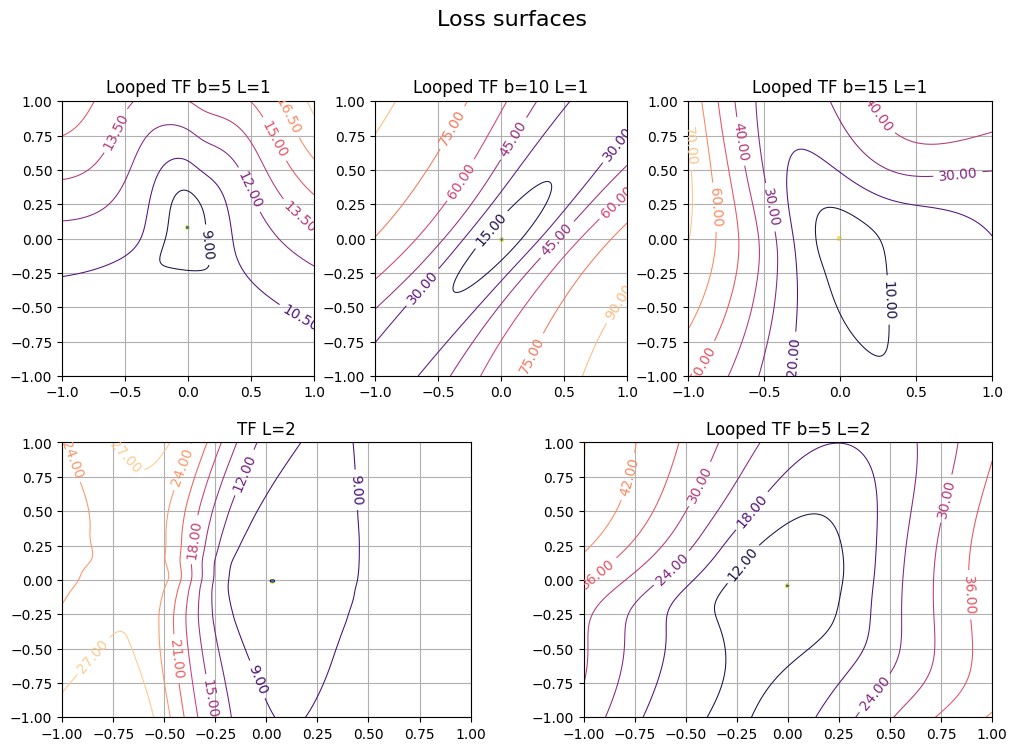

In [91]:
#fig, ax = plt.subplots(2 , 3, figsize = (14,10))
from matplotlib.gridspec import GridSpec

# do not forget constrained_layout=True to have some space between axes
fig = plt.figure(constrained_layout=True)
fig.set_size_inches(12, 8)
gs = GridSpec(11, 18, figure=fig)

ax00 = fig.add_subplot(gs[:5, :5])
ax01 = fig.add_subplot(gs[:5, 6:11])
ax02 = fig.add_subplot(gs[:5, 12:])

ax10 = fig.add_subplot(gs[6:, :8])
ax11 = fig.add_subplot(gs[6:, 10:])

fig.suptitle("Loss surfaces", fontsize=16)
fig.subplots_adjust(top=0.9)

loss_landscape_b5.plot_contour(ax00,
                               trace=trace_b5,
                               ralpha=ralpha_b5, rbeta=rbeta_b5, surface=surface_b5,
                               colormap="magma", k=0.5, label="Looped TF b=5 L=1"
                               )

loss_landscape_b10.plot_contour(ax01,
                                trace=trace_b10,
                                ralpha=ralpha_b10, rbeta=rbeta_b10, surface=surface_b10,
                                colormap="magma", k=0.5, label="Looped TF b=10 L=1"
                                )

loss_landscape_b15.plot_contour(ax02,
                                trace=trace_b15,
                                ralpha=ralpha_b15, rbeta=rbeta_b15, surface=surface_b15,
                                colormap="magma", k=0.5, label="Looped TF b=15 L=1"
                                )


loss_landscape_l2.plot_contour(ax10,
                               trace=trace_l2,
                               ralpha=ralpha_l2, rbeta=rbeta_l2, surface=surface_l2,
                               colormap="magma", k=0.5, label="TF L=2"
                               )

loss_landscape_l2_b5.plot_contour(ax11,
                               trace=trace_l2_b5,
                               ralpha=ralpha_l2_b5, rbeta=rbeta_l2_b5, surface=surface_l2_b5,
                               colormap="magma", k=0.5, label="Looped TF b=5 L=2"
                               )

fig.savefig("../images/loss_surface.png")

C:\Users\Vadim_K\miniconda3\envs\looped_tf\lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


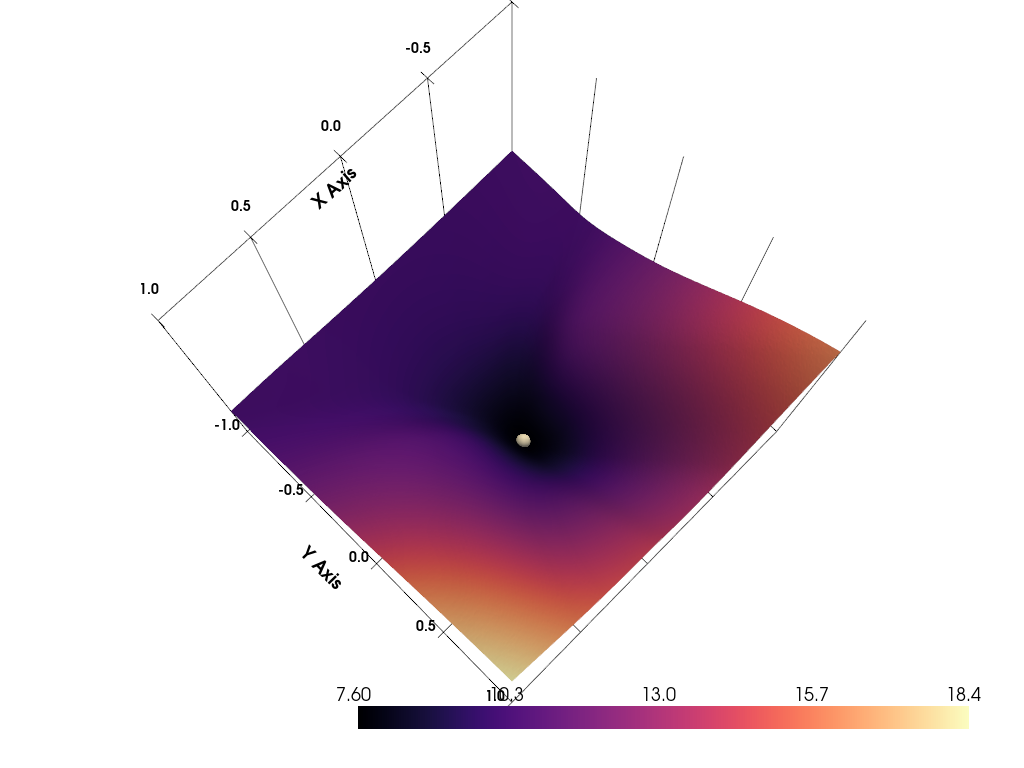

In [34]:
loss_landscape_b5.plot(
    trace=trace_b5,
    ralpha=ralpha_b5, rbeta=rbeta_b5, surface=surface_b5,
    colormap="magma", k=1
)

C:\Users\Vadim_K\miniconda3\envs\looped_tf\lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


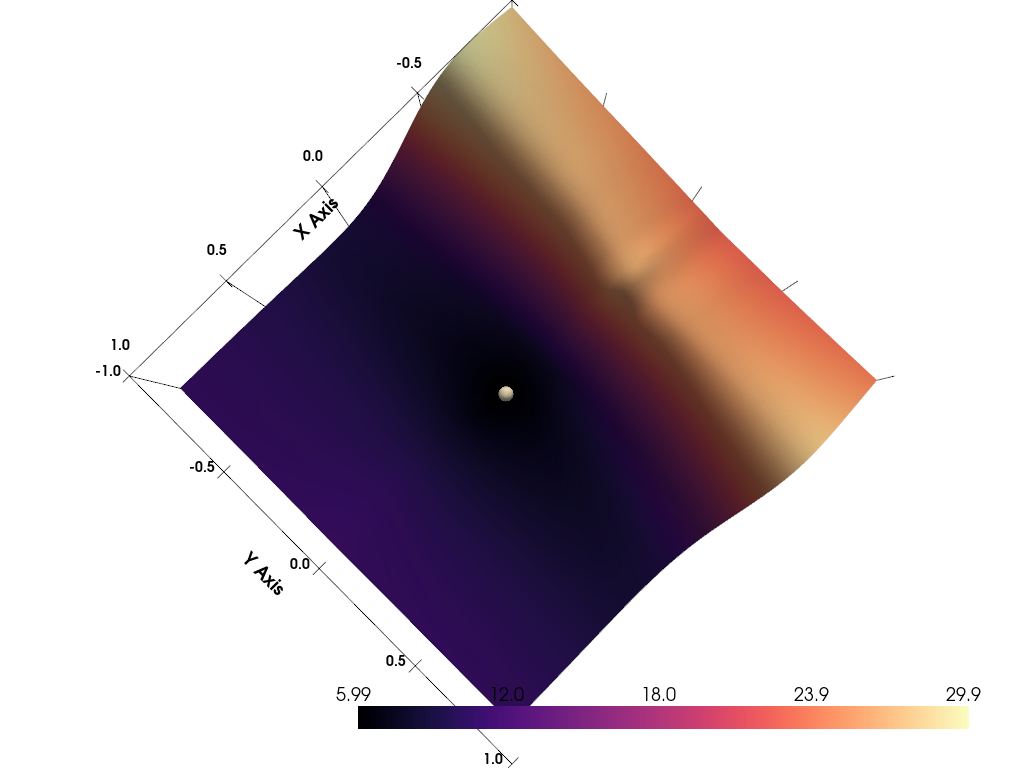

In [35]:
loss_landscape_l2.plot(
    trace=trace_l2,
    ralpha=ralpha_l2, rbeta=rbeta_l2, surface=surface_l2,
    colormap="magma", k=0.5
)

C:\Users\Vadim_K\miniconda3\envs\looped_tf\lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


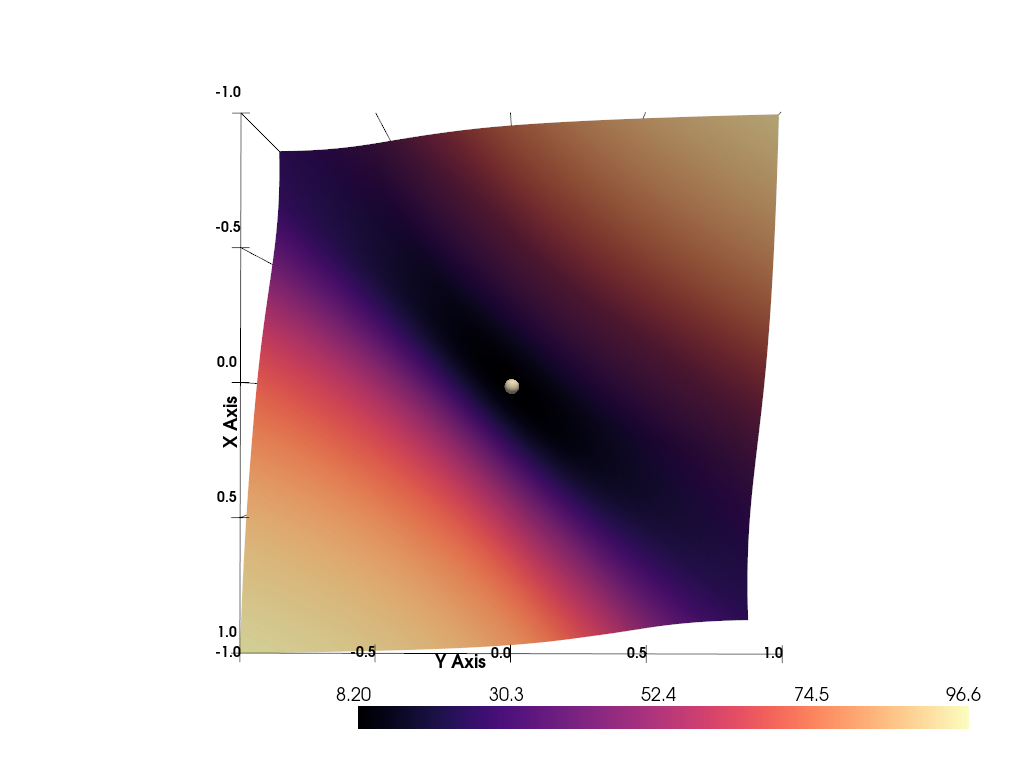

In [36]:
loss_landscape_b10.plot(
    trace=trace_b10,
    ralpha=ralpha_b10, rbeta=rbeta_b10, surface=surface_b10,
    colormap="magma", k=0.5
)

C:\Users\Vadim_K\miniconda3\envs\looped_tf\lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


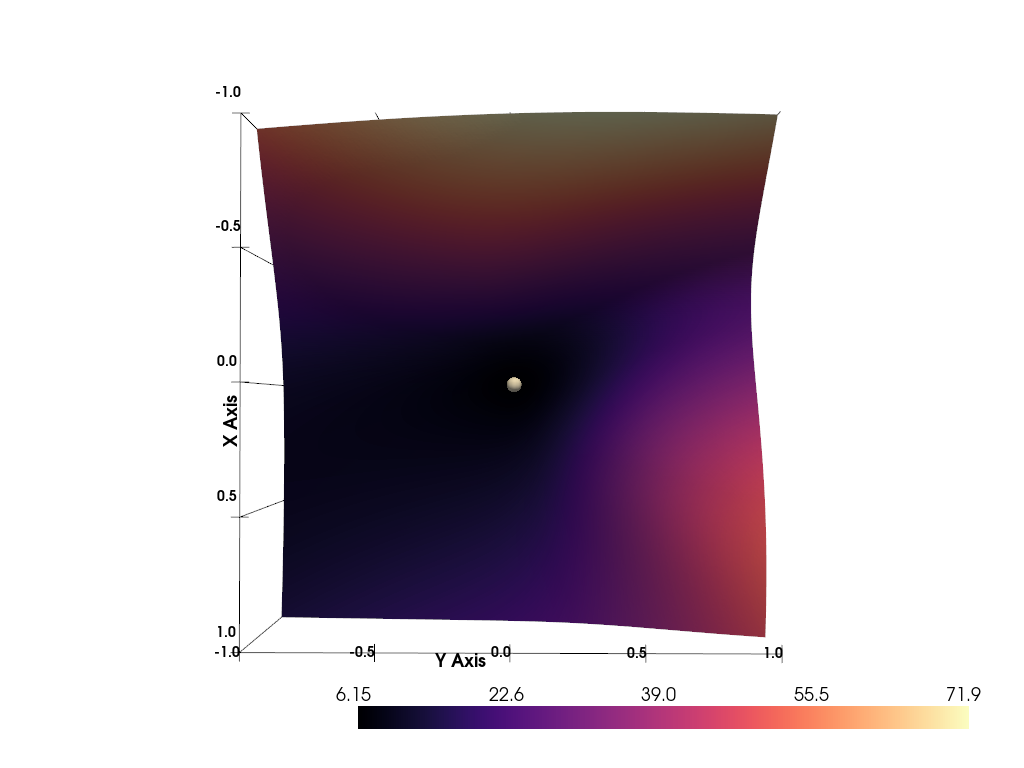

In [38]:
loss_landscape_b15.plot(
    trace=trace_b15,
    ralpha=ralpha_b15, rbeta=rbeta_b15, surface=surface_b15,
    colormap="magma", k=0.5
)

C:\Users\Vadim_K\miniconda3\envs\looped_tf\lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


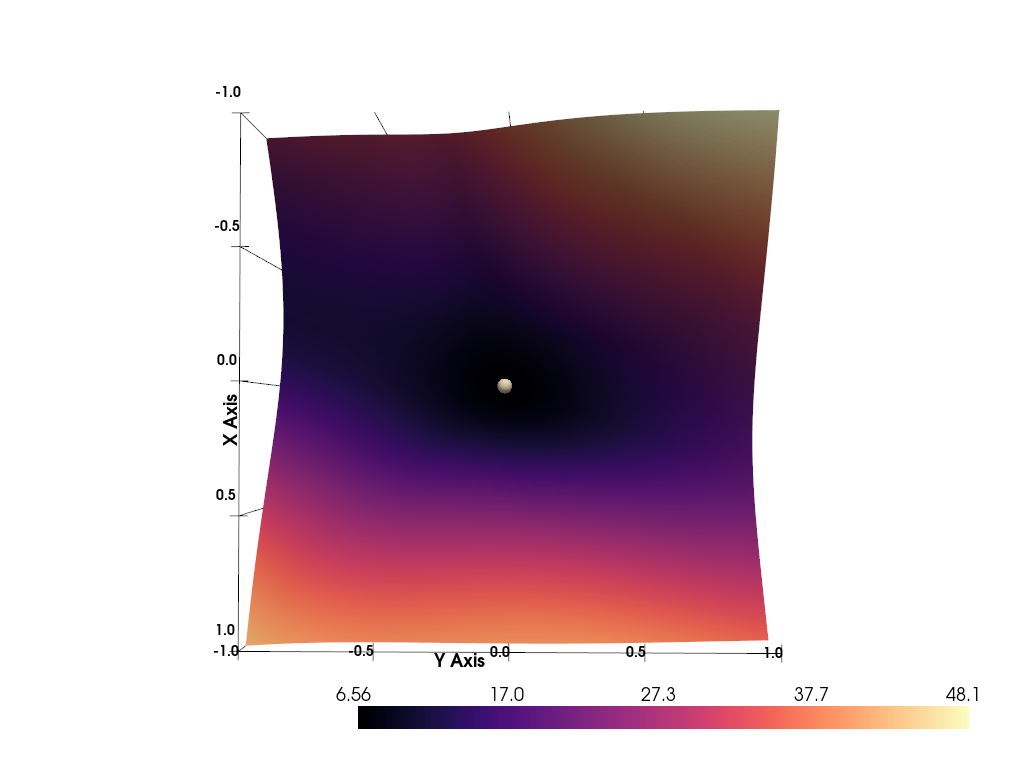

In [93]:
loss_landscape_l2_b5.plot(
                          trace=trace_l2_b5,
                          ralpha=ralpha_l2_b5, rbeta=rbeta_l2_b5, surface=surface_l2_b5,
                          colormap="magma", k=0.5
                          )
